In [600]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Requirement already up-to-date: pandas-profiling[notebook] in /opt/conda/lib/python3.7/site-packages (3.0.0)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [601]:
import pandas as pd
from scipy.io import arff
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [ ]:
# READ DATASET

In [602]:
df = pd.read_csv("lebron_career.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   game        1265 non-null   int64  
 1   date        1265 non-null   object 
 2   age         1265 non-null   object 
 3   team        1265 non-null   object 
 4   opp         1265 non-null   object 
 5   outcome     1265 non-null   int64  
 6   result      1265 non-null   object 
 7   mp          1265 non-null   int64  
 8   fg          1265 non-null   int64  
 9   fga         1265 non-null   int64  
 10  fgp         1265 non-null   float64
 11  three       1265 non-null   int64  
 12  threeatt    1265 non-null   int64  
 13  threep      1225 non-null   float64
 14  ft          1265 non-null   int64  
 15  fta         1265 non-null   int64  
 16  ftp         1251 non-null   float64
 17  orb         1265 non-null   int64  
 18  drb         1265 non-null   int64  
 19  trb         1265 non-null  

In [ ]:
# CONVERT DATE ATTRIBUTE TO DATE-TIME FORMAT

In [603]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   game        1265 non-null   int64         
 1   date        1265 non-null   datetime64[ns]
 2   age         1265 non-null   object        
 3   team        1265 non-null   object        
 4   opp         1265 non-null   object        
 5   outcome     1265 non-null   int64         
 6   result      1265 non-null   object        
 7   mp          1265 non-null   int64         
 8   fg          1265 non-null   int64         
 9   fga         1265 non-null   int64         
 10  fgp         1265 non-null   float64       
 11  three       1265 non-null   int64         
 12  threeatt    1265 non-null   int64         
 13  threep      1225 non-null   float64       
 14  ft          1265 non-null   int64         
 15  fta         1265 non-null   int64         
 16  ftp         1251 non-nul

In [ ]:
# CONVERT GAME SCORE TO NUMERIC FORMAT

In [604]:
df["game_score"] = pd.to_numeric(df["game_score"],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265 entries, 0 to 1264
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   game        1265 non-null   int64         
 1   date        1265 non-null   datetime64[ns]
 2   age         1265 non-null   object        
 3   team        1265 non-null   object        
 4   opp         1265 non-null   object        
 5   outcome     1265 non-null   int64         
 6   result      1265 non-null   object        
 7   mp          1265 non-null   int64         
 8   fg          1265 non-null   int64         
 9   fga         1265 non-null   int64         
 10  fgp         1265 non-null   float64       
 11  three       1265 non-null   int64         
 12  threeatt    1265 non-null   int64         
 13  threep      1225 non-null   float64       
 14  ft          1265 non-null   int64         
 15  fta         1265 non-null   int64         
 16  ftp         1251 non-nul

In [ ]:
# DROP ATTRIBUTES THAT ARE NOT RELEVANT TO MODEL

In [605]:
df = df.drop(['game', 'age', 'team', 'opp'], axis = 1)

In [ ]:
# RENAME ATTRIBUTES TO IMPROVE LABELS

In [606]:
df = df.rename(columns={"date" : "Date", "outcome" : "Outcome", "result" : "Result", "mp" : "Minutes Played", "fg" : "Field Goals Made", "fga" : "Field Goals Attempted", "fgp" : "Field Goal Percentage", "three" : "3-Point Field Goals Made", "threeatt" : "3-Point Field Goals Attempted", "threep" : "3-Point Field Goals Percentage", "ft":"Free Throws Made","fta":"Free Throws Attempted", "ftp" : "Free Throw Percentage", "orb" : "Offesive Rebounds", "drb":"Defensive Rebounds", "trb" : "Total Rebounds", "ast" : "Assists", "stl" : "Steals", "blk" : "Blocks", "tov" : "Turnovers", "pts" : "Points", "game_score" : "Game Score", "plus_minus" : "Player Impact on Game"})
df.head(5)

,Date,Outcome,Result,Minutes Played,Field Goals Made,Field Goals Attempted,Field Goal Percentage,3-Point Field Goals Made,3-Point Field Goals Attempted,3-Point Field Goals Percentage,...,Offesive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Game Score,Player Impact on Game
0,2003-11-07,0,L (-1),44,8,18,0.444,1,2,0.500,...,0,5,5,3,0,0,7,23,9.0,-7
1,2004-04-06,0,L (-1),46,5,17,0.294,0,0,NaN,...,1,5,6,4,3,0,3,21,14.1,2
2,2006-01-12,0,L (-1),40,11,22,0.500,2,3,0.667,...,0,2,2,9,0,0,5,28,16.1,5
3,2006-01-18,0,L (-1),42,7,20,0.350,2,6,0.333,...,2,9,11,9,0,0,2,24,16.4,-3
4,2007-02-14,0,L (-1),43,9,25,0.360,0,3,0.000,...,3,7,10,4,1,3,0,23,16.8,10


In [607]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [608]:
df.head(5)

,Date,Outcome,Result,Minutes Played,Field Goals Made,Field Goals Attempted,Field Goal Percentage,3-Point Field Goals Made,3-Point Field Goals Attempted,3-Point Field Goals Percentage,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Game Score,Player Impact on Game,Year
0,2003-11-07,0,L (-1),44,8,18,0.444,1,2,0.500,...,5,5,3,0,0,7,23,9.0,-7,2003
1,2004-04-06,0,L (-1),46,5,17,0.294,0,0,NaN,...,5,6,4,3,0,3,21,14.1,2,2004
2,2006-01-12,0,L (-1),40,11,22,0.500,2,3,0.667,...,2,2,9,0,0,5,28,16.1,5,2006
3,2006-01-18,0,L (-1),42,7,20,0.350,2,6,0.333,...,9,11,9,0,0,2,24,16.4,-3,2006
4,2007-02-14,0,L (-1),43,9,25,0.360,0,3,0.000,...,7,10,4,1,3,0,23,16.8,10,2007


In [ ]:
# CHECK FOR DUPLICATE VALUES

In [609]:
df.shape
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 24)


In [ ]:
# CHECK FOR NULL VALUES

In [610]:
print(df.isnull().sum())
df.count()

Date                               0
Outcome                            0
Result                             0
Minutes Played                     0
Field Goals Made                   0
Field Goals Attempted              0
Field Goal Percentage              0
3-Point Field Goals Made           0
3-Point Field Goals Attempted      0
3-Point Field Goals Percentage    40
Free Throws Made                   0
Free Throws Attempted              0
Free Throw Percentage             14
Offesive Rebounds                  0
Defensive Rebounds                 0
Total Rebounds                     0
Assists                            0
Steals                             0
Blocks                             0
Turnovers                          0
Points                             0
Game Score                         0
Player Impact on Game              0
Year                               0
dtype: int64


Date                              1265
Outcome                           1265
Result                            1265
Minutes Played                    1265
Field Goals Made                  1265
Field Goals Attempted             1265
Field Goal Percentage             1265
3-Point Field Goals Made          1265
3-Point Field Goals Attempted     1265
3-Point Field Goals Percentage    1225
Free Throws Made                  1265
Free Throws Attempted             1265
Free Throw Percentage             1251
Offesive Rebounds                 1265
Defensive Rebounds                1265
Total Rebounds                    1265
Assists                           1265
Steals                            1265
Blocks                            1265
Turnovers                         1265
Points                            1265
Game Score                        1265
Player Impact on Game             1265
Year                              1265
dtype: int64

In [ ]:
# REPLACE NULL VALUES WITH ATTRIBUTE AVERAGE FOR THE YEAR

In [611]:
FGP_overall_avg = df["3-Point Field Goals Percentage"].mean()
FGP_overall_avg

0.3105322448979593

In [612]:
FGP_avg = pd.DataFrame(df.groupby('Year')['3-Point Field Goals Percentage'].mean())
FGP_avg

,3-Point Field Goals Percentage
Year,
2003,0.236033
2004,0.285582
2005,0.311792
2006,0.319734
2007,0.229387
2008,0.272772
2009,0.335614
2010,0.332711
2011,0.223295


In [613]:
df["3-Point Field Goals Percentage"].fillna(FGP_overall_avg, inplace = True)

In [614]:
FTP_overall_avg = df["Free Throw Percentage"].mean()
FTP_overall_avg

0.7283349320543557

In [615]:
FTP_avg = pd.DataFrame(df.groupby('Year')['Free Throw Percentage'].mean())
FTP_avg

,Free Throw Percentage
Year,
2003,0.752241
2004,0.748360
2005,0.750506
2006,0.700562
2007,0.710878
2008,0.740692
2009,0.777133
2010,0.756145
2011,0.729816


In [616]:
df["Free Throw Percentage"].fillna(FTP_overall_avg, inplace = True)

In [ ]:
# RE-CHECK NULL VALUES

In [617]:
print(df.isnull().sum())
df.count()

Date                              0
Outcome                           0
Result                            0
Minutes Played                    0
Field Goals Made                  0
Field Goals Attempted             0
Field Goal Percentage             0
3-Point Field Goals Made          0
3-Point Field Goals Attempted     0
3-Point Field Goals Percentage    0
Free Throws Made                  0
Free Throws Attempted             0
Free Throw Percentage             0
Offesive Rebounds                 0
Defensive Rebounds                0
Total Rebounds                    0
Assists                           0
Steals                            0
Blocks                            0
Turnovers                         0
Points                            0
Game Score                        0
Player Impact on Game             0
Year                              0
dtype: int64


Date                              1265
Outcome                           1265
Result                            1265
Minutes Played                    1265
Field Goals Made                  1265
Field Goals Attempted             1265
Field Goal Percentage             1265
3-Point Field Goals Made          1265
3-Point Field Goals Attempted     1265
3-Point Field Goals Percentage    1265
Free Throws Made                  1265
Free Throws Attempted             1265
Free Throw Percentage             1265
Offesive Rebounds                 1265
Defensive Rebounds                1265
Total Rebounds                    1265
Assists                           1265
Steals                            1265
Blocks                            1265
Turnovers                         1265
Points                            1265
Game Score                        1265
Player Impact on Game             1265
Year                              1265
dtype: int64

In [ ]:
# DROP NA ROWS

In [618]:
df = df.dropna()
df.count()

Date                              1265
Outcome                           1265
Result                            1265
Minutes Played                    1265
Field Goals Made                  1265
Field Goals Attempted             1265
Field Goal Percentage             1265
3-Point Field Goals Made          1265
3-Point Field Goals Attempted     1265
3-Point Field Goals Percentage    1265
Free Throws Made                  1265
Free Throws Attempted             1265
Free Throw Percentage             1265
Offesive Rebounds                 1265
Defensive Rebounds                1265
Total Rebounds                    1265
Assists                           1265
Steals                            1265
Blocks                            1265
Turnovers                         1265
Points                            1265
Game Score                        1265
Player Impact on Game             1265
Year                              1265
dtype: int64

In [619]:
print(df.isnull().sum())

Date                              0
Outcome                           0
Result                            0
Minutes Played                    0
Field Goals Made                  0
Field Goals Attempted             0
Field Goal Percentage             0
3-Point Field Goals Made          0
3-Point Field Goals Attempted     0
3-Point Field Goals Percentage    0
Free Throws Made                  0
Free Throws Attempted             0
Free Throw Percentage             0
Offesive Rebounds                 0
Defensive Rebounds                0
Total Rebounds                    0
Assists                           0
Steals                            0
Blocks                            0
Turnovers                         0
Points                            0
Game Score                        0
Player Impact on Game             0
Year                              0
dtype: int64


In [620]:
df.describe()

,Outcome,Minutes Played,Field Goals Made,Field Goals Attempted,Field Goal Percentage,3-Point Field Goals Made,3-Point Field Goals Attempted,3-Point Field Goals Percentage,Free Throws Made,Free Throws Attempted,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Game Score,Player Impact on Game,Year
count,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,...,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000,1265.000000
mean,0.663241,38.395257,9.866403,19.589723,0.504983,1.482213,4.310672,0.310532,5.852964,7.969960,...,6.241897,7.434783,7.388142,1.592885,0.756522,3.497233,27.067984,22.224980,5.410277,2011.366798
std,0.472789,5.173445,3.070431,4.780305,0.112042,1.424761,2.404325,0.243339,3.424208,4.179219,...,2.718022,3.024278,3.013475,1.295481,0.904896,1.830266,7.817750,7.727219,12.692632,4.865583
min,0.000000,11.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-0.100000,-39.000000,2003.000000
25%,0.000000,35.000000,8.000000,16.000000,0.429000,0.000000,3.000000,0.000000,3.000000,5.000000,...,4.000000,5.000000,5.000000,1.000000,0.000000,2.000000,22.000000,17.000000,-3.000000,2007.000000
50%,1.000000,39.000000,10.000000,20.000000,0.500000,1.000000,4.000000,0.310532,5.000000,8.000000,...,6.000000,7.000000,7.000000,1.000000,1.000000,3.000000,27.000000,22.600000,6.000000,2012.000000
75%,1.000000,42.000000,12.000000,23.000000,0.579000,2.000000,6.000000,0.500000,8.000000,11.000000,...,8.000000,9.000000,9.000000,2.000000,1.000000,5.000000,32.000000,27.200000,14.000000,2016.000000
max,1.000000,55.000000,23.000000,36.000000,0.929000,8.000000,13.000000,1.000000,24.000000,28.000000,...,17.000000,19.000000,19.000000,7.000000,5.000000,11.000000,61.000000,53.200000,39.000000,2020.000000


In [621]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df.head(5)

,Date,Outcome,Result,Minutes Played,Field Goals Made,Field Goals Attempted,Field Goal Percentage,3-Point Field Goals Made,3-Point Field Goals Attempted,3-Point Field Goals Percentage,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Game Score,Player Impact on Game,Year
0,2003-11-07,0,L (-1),44,8,18,0.444,1,2,0.500000,...,5,5,3,0,0,7,23,9.0,-7,2003
1,2004-04-06,0,L (-1),46,5,17,0.294,0,0,0.310532,...,5,6,4,3,0,3,21,14.1,2,2004
2,2006-01-12,0,L (-1),40,11,22,0.500,2,3,0.667000,...,2,2,9,0,0,5,28,16.1,5,2006
3,2006-01-18,0,L (-1),42,7,20,0.350,2,6,0.333000,...,9,11,9,0,0,2,24,16.4,-3,2006
4,2007-02-14,0,L (-1),43,9,25,0.360,0,3,0.000000,...,7,10,4,1,3,0,23,16.8,10,2007


In [ ]:
# DATA VISUALIZATION

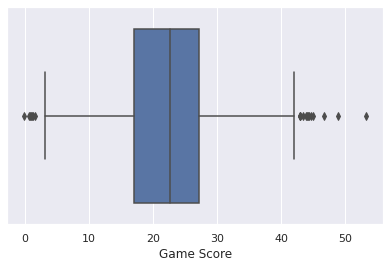

In [622]:
sns.boxplot(x=df["Game Score"])

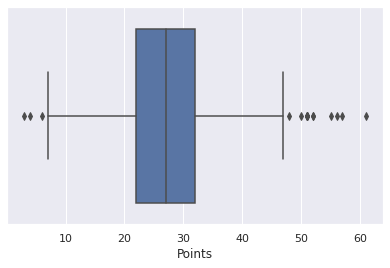

In [623]:
sns.boxplot(x=df["Points"])

In [624]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3- Q1
print(IQR)

Outcome                            1.000
Minutes Played                     7.000
Field Goals Made                   4.000
Field Goals Attempted              7.000
Field Goal Percentage              0.150
3-Point Field Goals Made           2.000
3-Point Field Goals Attempted      3.000
3-Point Field Goals Percentage     0.500
Free Throws Made                   5.000
Free Throws Attempted              6.000
Free Throw Percentage              0.232
Offesive Rebounds                  2.000
Defensive Rebounds                 4.000
Total Rebounds                     4.000
Assists                            4.000
Steals                             1.000
Blocks                             1.000
Turnovers                          3.000
Points                            10.000
Game Score                        10.200
Player Impact on Game             17.000
Year                               9.000
dtype: float64


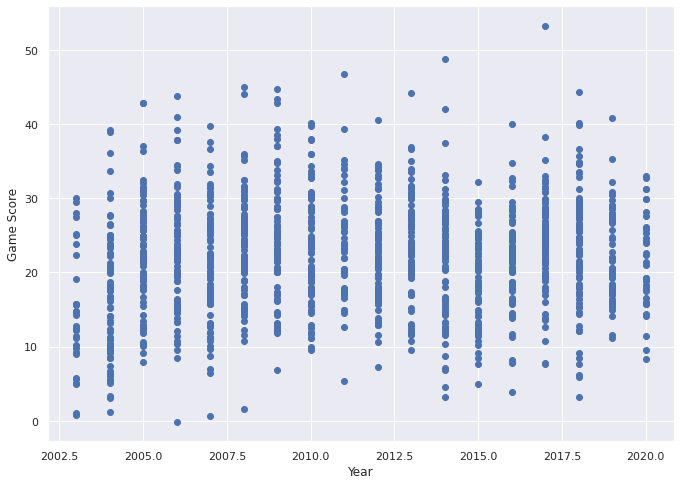

In [625]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df["Year"], df["Game Score"])
ax.set_xlabel("Year")
ax.set_ylabel("Game Score")
plt.show()

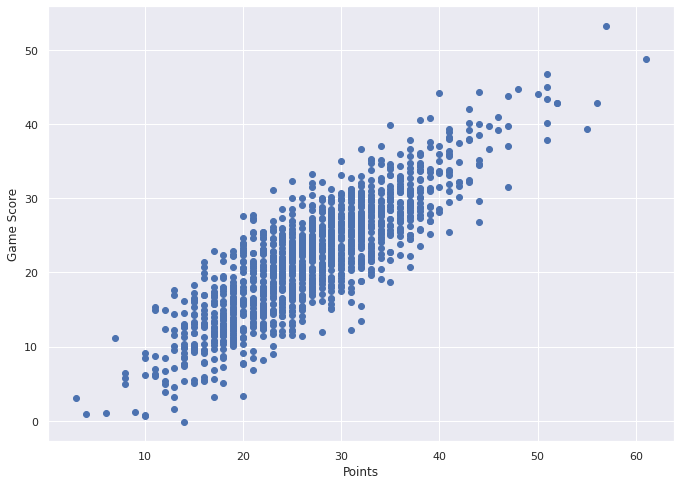

In [626]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df["Points"], df["Game Score"])
ax.set_xlabel("Points")
ax.set_ylabel("Game Score")
plt.show()

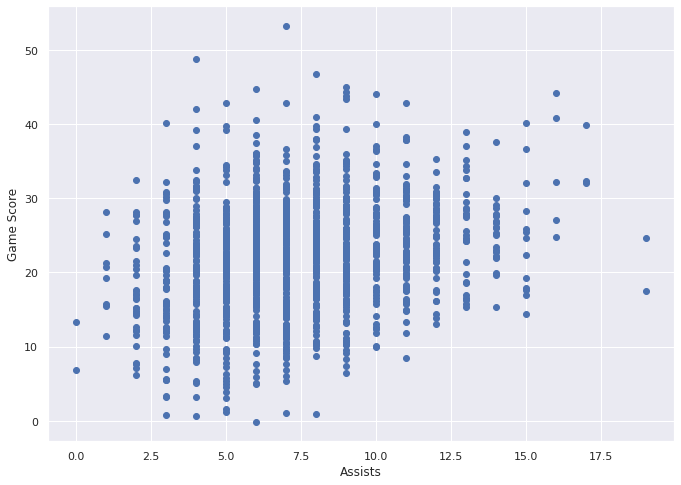

In [627]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df["Assists"], df["Game Score"])
ax.set_xlabel("Assists")
ax.set_ylabel("Game Score")
plt.show()

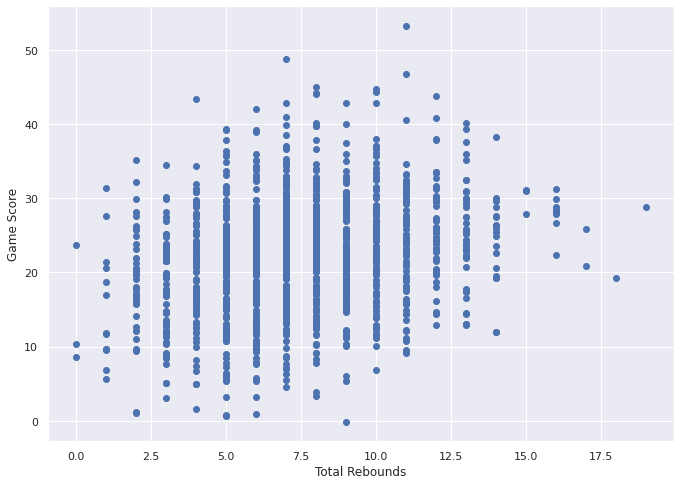

In [628]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(df["Total Rebounds"], df["Game Score"])
ax.set_xlabel("Total Rebounds")
ax.set_ylabel("Game Score")
plt.show()

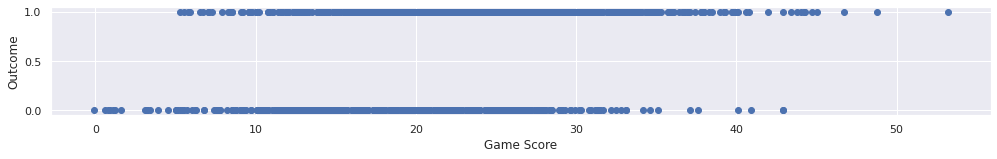

In [629]:
fig, ax = plt.subplots(figsize = (15,2))
ax.scatter(df["Game Score"], df["Outcome"])
ax.set_xlabel("Game Score")
ax.set_ylabel("Outcome")
plt.show()

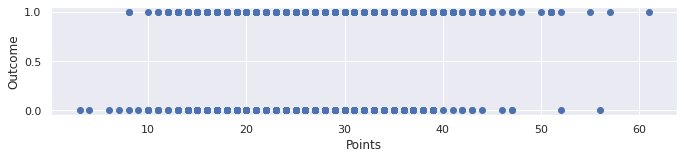

In [630]:
fig, ax = plt.subplots(figsize = (10,2))
ax.scatter(df["Points"], df["Outcome"])
ax.set_xlabel("Points")
ax.set_ylabel("Outcome")
plt.show()

In [ ]:
# HEATMAP TO UNDERSTAND CORRELATION

,Outcome,Minutes Played,Field Goals Made,Field Goals Attempted,Field Goal Percentage,3-Point Field Goals Made,3-Point Field Goals Attempted,3-Point Field Goals Percentage,Free Throws Made,Free Throws Attempted,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Points,Game Score,Player Impact on Game,Year
Outcome,1.000000,-0.142195,0.109045,-0.100737,0.280702,0.039254,-0.099283,0.104472,0.063706,0.022504,...,0.108384,0.083669,0.175665,0.096319,0.059689,-0.161988,0.120713,0.309787,0.719796,0.090538
Minutes Played,-0.142195,1.000000,0.333335,0.531682,-0.114244,0.083493,0.196386,-0.009456,0.316480,0.351094,...,0.172673,0.215438,0.115292,0.154231,0.122815,0.123773,0.415672,0.282539,-0.237062,-0.373238
Field Goals Made,0.109045,0.333335,1.000000,0.743063,0.607843,0.404463,0.345560,0.267394,0.062843,0.077864,...,0.086919,0.128520,-0.047746,0.101475,0.028148,0.041535,0.886740,0.742030,0.094972,0.035004
Field Goals Attempted,-0.100737,0.531682,0.743063,1.000000,-0.048071,0.298097,0.448540,0.052067,0.150588,0.191802,...,0.100380,0.191788,-0.051490,0.101653,0.064129,0.024059,0.703963,0.414482,-0.126506,-0.156658
Field Goal Percentage,0.280702,-0.114244,0.607843,-0.048071,1.000000,0.231525,-0.016603,0.339757,-0.064876,-0.090876,...,0.023332,-0.016371,-0.002181,0.032984,-0.014835,0.035117,0.491241,0.611937,0.297534,0.239463
3-Point Field Goals Made,0.039254,0.083493,0.404463,0.298097,0.231525,1.000000,0.766405,0.704136,-0.007023,0.024889,...,0.028079,0.025849,0.017917,-0.020857,-0.003362,0.055425,0.496878,0.418014,0.058436,0.142798
3-Point Field Goals Attempted,-0.099283,0.196386,0.345560,0.448540,-0.016603,0.766405,1.000000,0.245597,0.070321,0.136353,...,0.102168,0.105988,0.087077,-0.013209,0.024249,0.113368,0.441914,0.295798,-0.078635,0.192120
3-Point Field Goals Percentage,0.104472,-0.009456,0.267394,0.052067,0.339757,0.704136,0.245597,1.000000,-0.044139,-0.048127,...,-0.010834,-0.014469,-0.038973,-0.043821,-0.010884,0.030786,0.319032,0.315295,0.124841,0.062001
Free Throws Made,0.063706,0.316480,0.062843,0.150588,-0.064876,-0.007023,0.070321,-0.044139,1.000000,0.927961,...,0.053042,0.072108,-0.024749,0.054266,0.113547,0.008140,0.486088,0.430114,0.022250,-0.186559
Free Throws Attempted,0.022504,0.351094,0.077864,0.191802,-0.090876,0.024889,0.136353,-0.048127,0.927961,1.000000,...,0.087003,0.107320,-0.008936,0.029887,0.110195,0.031638,0.472149,0.370331,-0.025361,-0.172320


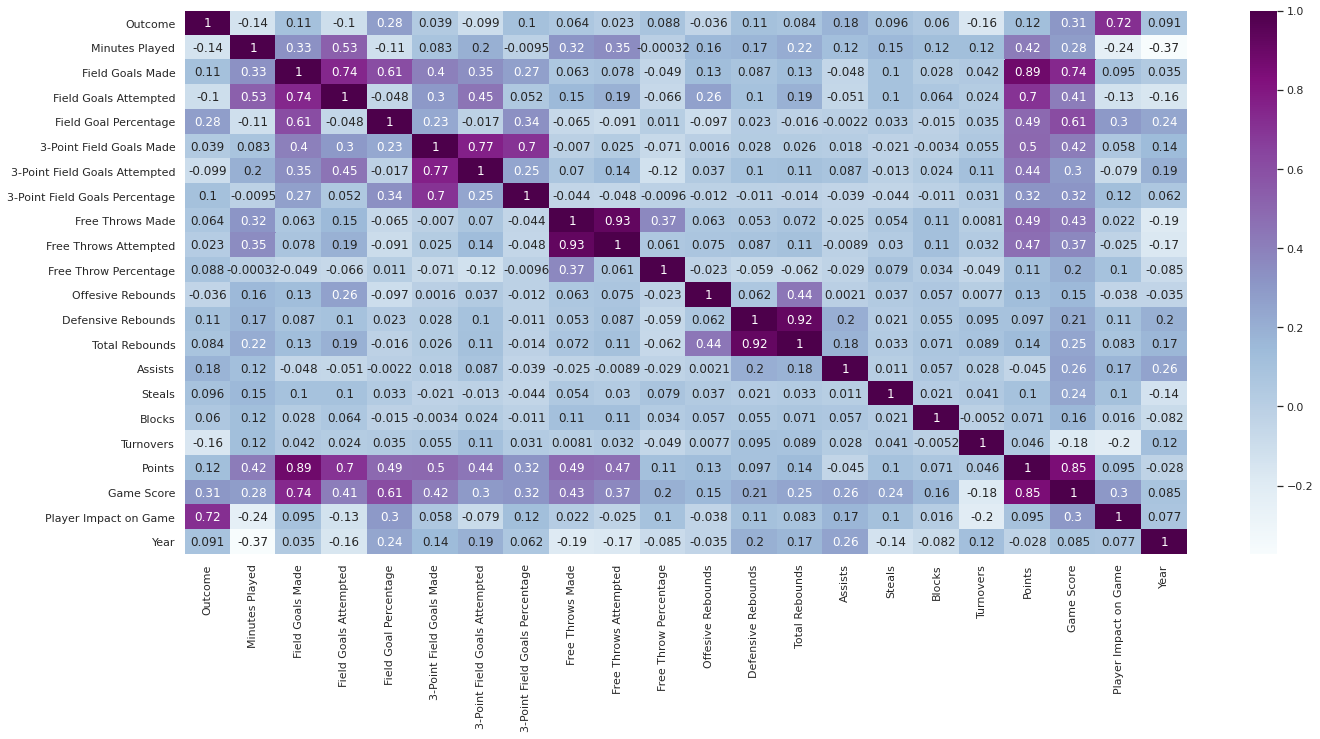

In [631]:
plt.figure(figsize = (20,10))
c = df.corr()
sns.heatmap(c,cmap = "BuPu" , annot = True)
c

In [632]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
# DROP COLUMNS TO BEGIN CREATING MODEL

In [633]:
cols = ["Outcome", "Result", "Minutes Played", "Field Goals Made", "Field Goals Attempted", "Field Goal Percentage","3-Point Field Goals Made", "3-Point Field Goals Attempted", "3-Point Field Goals Percentage", "Free Throws Made","Free Throws Attempted",  "Free Throw Percentage","Offesive Rebounds","Defensive Rebounds", "Total Rebounds", "Assists", "Steals", "Blocks", "Turnovers",  "Points","Player Impact on Game","Year"]
df.drop(cols,axis=1,inplace=True)

In [ ]:
# SET INDEX AS THE DATE ATTRIBUTE

In [634]:
df.set_index('Date')

,Game Score
Date,
2003-11-07,9.0
2004-04-06,14.1
2006-01-12,16.1
2006-01-18,16.4
2007-02-14,16.8
...,...
2019-12-03,19.7
2019-12-11,17.7
2020-01-18,22.6


In [635]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1265 entries, 0 to 1264
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1265 non-null   datetime64[ns]
 1   Game Score  1265 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.6 KB


In [ ]:
# CREATE INITIAL TIME SERIES

<Figure size 2160x432 with 0 Axes>

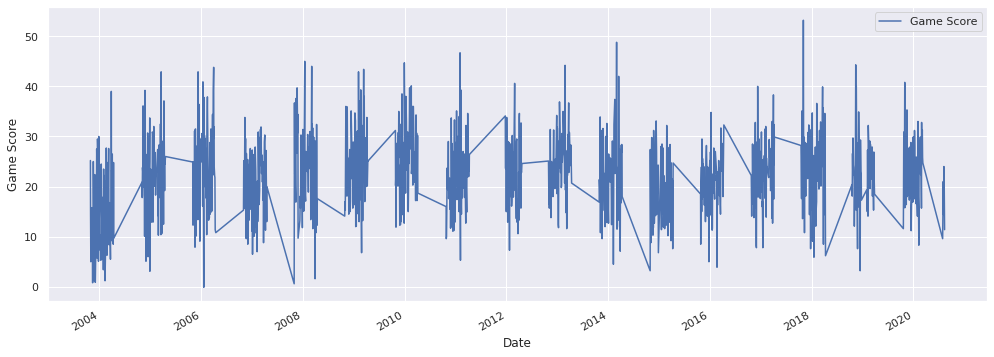

In [636]:
plt.figure(figsize=(30,6))
y = df.plot(x='Date', figsize = (15,6))
plt.xlabel('Date')
plt.ylabel('Game Score')
plt.show()

In [594]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

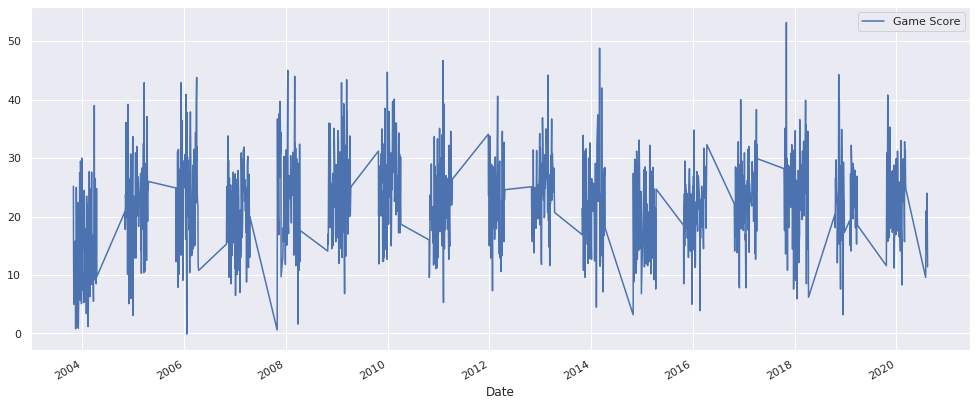

In [637]:
df.columns=["Date","Game Score"]
df.head()
df.describe()
df.set_index('Date',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [638]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# HYPOTHESIS TESTING FOR STATOINARY OR NON-STATIONARY DATA

In [639]:
test_result=adfuller(df['Game Score'])

In [640]:
result = [0] * df["Game Score"]

def adfuller_test(game_score):
    result = adfuller(game_score)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("There is strong evidence against the null hypothesis(Ho), indicating the data is stationary")
else:
    print("There is weak evidence against null hypothesis, indicating the data is non-stationary ")

adfuller_test(df['Game Score'])

There is strong evidence against the null hypothesis(Ho), indicating the data is stationary
ADF Test Statistic : -5.810106709226791
p-value : 4.421795739773341e-07
#Lags Used : 13
Number of Observations : 1251


In [ ]:
# CHECKING SEASONA LFIRST DIFFERENCE AND GAME SCORE FIRST DIFFERENCE

In [641]:
df['Game Score First Difference'] = df['Game Score'] - df['Game Score'].shift(1)
df['Seasonal First Difference']=df['Game Score']-df['Game Score'].shift(12)
df.head()

,Game Score,Game Score First Difference,Seasonal First Difference
Date,,,
2003-11-07,9.0,NaN,NaN
2004-04-06,14.1,5.1,NaN
2006-01-12,16.1,2.0,NaN
2006-01-18,16.4,0.3,NaN
2007-02-14,16.8,0.4,NaN


In [ ]:
# RE-TESTING STATIONARITY OF DATA

In [642]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -12.468521105887417
p-value : 3.284286013893255e-23
#Lags Used : 23
Number of Observations : 1229


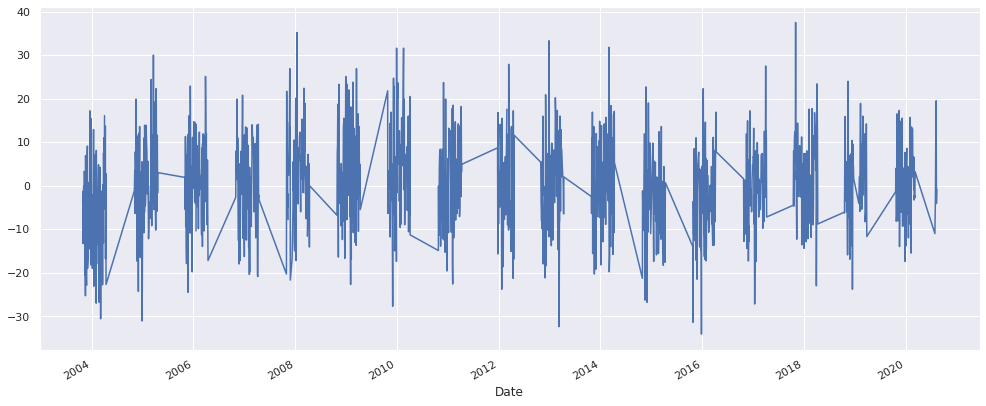

In [643]:
df['Seasonal First Difference'].plot()

In [ ]:
# PLOTTING AUTOCORRELATION

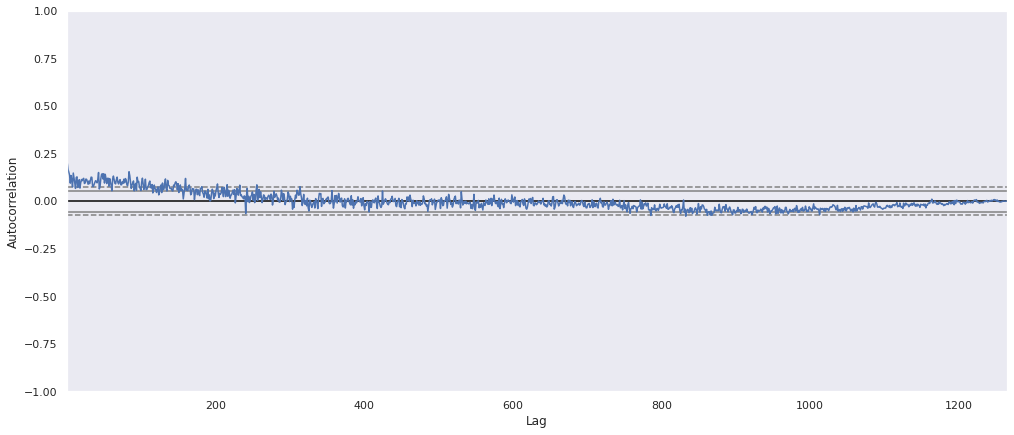

In [644]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Game Score'])
plt.show()

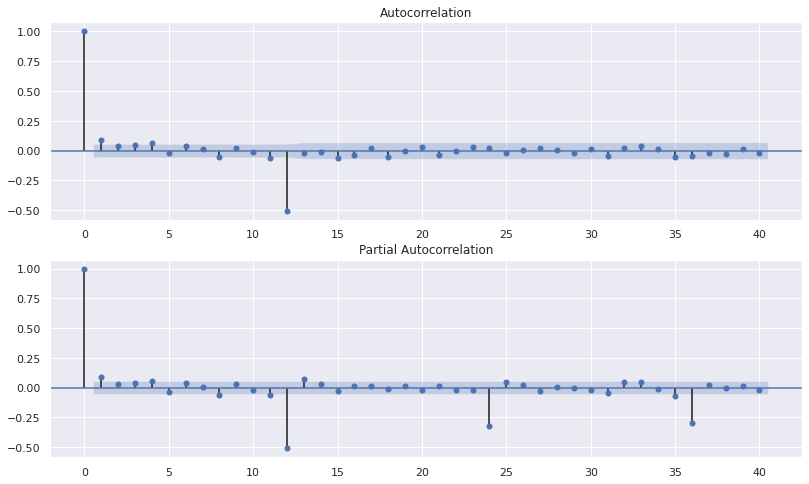

In [645]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [646]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Game Score'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Game Score   No. Observations:                 1264
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4306.474
Method:                       css-mle   S.D. of innovations              7.292
Date:                Tue, 06 Jul 2021   AIC                           8620.948
Time:                        02:21:05   BIC                           8641.516
Sample:                             1   HQIC                          8628.676
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0059      0.003      1.833      0.067      -0.000       0.012
ar.L1.D.Game Score     0.0977      0.029      3.406      0.001       0.041       0.154
ma.L1.D.Game Score    -0.9870      0.006   -167.206      0.000      -0.999      -0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           10.2351           +0.0000j           10.2351            0.0000
MA.1            1.0132           +0.0000j            1.0132            0.0000
-----------------------------------------------------------------------------
"""

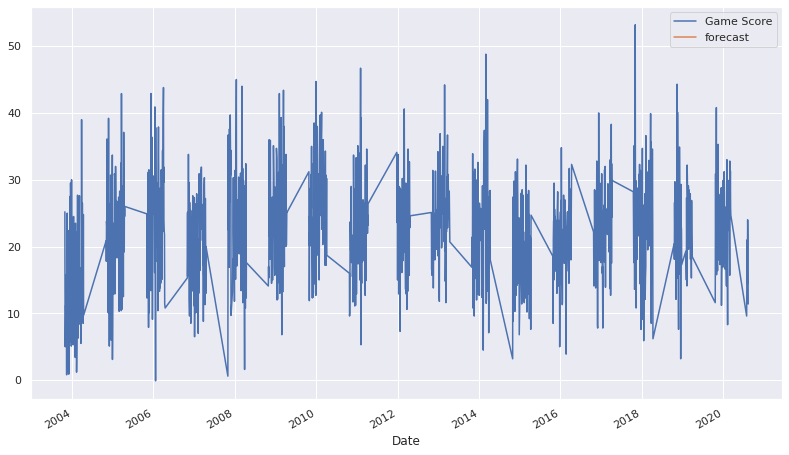

In [647]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Game Score','forecast']].plot(figsize=(12,8))